In [1]:
!pip3 install geopandas
#!pip install pip==18.1
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy
#!pip install geoplot

     |████████████████████████████████| 901kB 9.8MB/s 
     |████████████████████████████████| 17.9MB 38.0MB/s 
     |████████████████████████████████| 9.8MB 17.4MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=78fe69bce02c7a096d3ac79ce6118176d4567c290bb3b233f58c1ef6e4ef425c
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
%cd ./drive/My\ Drive/curso\ ciencia\ de\ datos

/content/drive/My Drive/curso ciencia de datos


In [4]:
!ls

2019-04-Diccionario_Servicios.csv     2019-05-29.gps.gz
2019-04-Diccionario_Servicios.gsheet  2019-05-30.gps.gz
2019-04-ShapeRutas.csv		      2019-05-31.gps.gz
2019-05-01.gps			      Comunas_RM_Mapas_Vectoriales
2019-05-02.gps.gz		      extractorDeRecorridos.py
2019-05-03.gps.gz		      Horarios.gsheet
2019-05-04.gps.gz		      old-recorrido506-dia1.gps
2019-05-05.gps.gz		      Presentaciones
2019-05-06.gps.gz		      recorrido118.gps
2019-05-07.gps.gz		      recorrido201e.gps
2019-05-08.gps.gz		      recorrido210.gps
2019-05-09.gps.gz		      recorrido211c.gps
2019-05-10.gps.gz		      recorrido301.gps
2019-05-11.gps.gz		      recorrido307.gps
2019-05-12.gps.gz		      recorrido315e.gps
2019-05-13.gps.gz		      recorrido401.gps
2019-05-14.gps.gz		      recorrido421.gps
2019-05-15.gps.gz		      recorrido428e.gps
2019-05-16.gps.gz		      recorrido428.gps
2019-05-17.gps.gz		      recorrido506.gps
2019-05-18.gps.gz		      recorrido712.gps
2019-05-19.gps.gz		      recorridoC09.gps
2019-05-20.gps

In [0]:
#!gzip -d 2019-05-01.gps.gz

In [6]:
!ls

2019-04-Diccionario_Servicios.csv     2019-05-29.gps.gz
2019-04-Diccionario_Servicios.gsheet  2019-05-30.gps.gz
2019-04-ShapeRutas.csv		      2019-05-31.gps.gz
2019-05-01.gps			      Comunas_RM_Mapas_Vectoriales
2019-05-02.gps.gz		      extractorDeRecorridos.py
2019-05-03.gps.gz		      Horarios.gsheet
2019-05-04.gps.gz		      old-recorrido506-dia1.gps
2019-05-05.gps.gz		      Presentaciones
2019-05-06.gps.gz		      recorrido118.gps
2019-05-07.gps.gz		      recorrido201e.gps
2019-05-08.gps.gz		      recorrido210.gps
2019-05-09.gps.gz		      recorrido211c.gps
2019-05-10.gps.gz		      recorrido301.gps
2019-05-11.gps.gz		      recorrido307.gps
2019-05-12.gps.gz		      recorrido315e.gps
2019-05-13.gps.gz		      recorrido401.gps
2019-05-14.gps.gz		      recorrido421.gps
2019-05-15.gps.gz		      recorrido428e.gps
2019-05-16.gps.gz		      recorrido428.gps
2019-05-17.gps.gz		      recorrido506.gps
2019-05-18.gps.gz		      recorrido712.gps
2019-05-19.gps.gz		      recorridoC09.gps
2019-05-20.gps

## Some imports

In [0]:
import pandas as pd
import numpy as np
import geopandas as gpd
#import geoplot as gplt
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

## Creating Pandas Transapp DataFrames

In [0]:
"""
1. Patente
2. Sonda (servicio interno que identifica recorrido de manera unica) (variantes)
3. Servicio de Usuario (lo que ve el pasajero)
4. Dia y hora (UTC). Ultimo dia de Abril y ultimo día de Mayo
5. Latitud
6. Longitud
7. x (UTM)
8. y (UTM)
9. Distancia en Ruta (desde inicio hasta t)
10. Distancia a la ruta (ortogonal a la polilinea)
11. Velocidad instantanea (maquina del GPS del bus)
12. Operador (codificacion empresa)
13. Identificador de expedición (viaje de un lugar a otro)
"""

def create_gps(gps_name):
  columns = ["Patente", "GPS_COD_SINRUT", "idx_user", "Date", "LAT", "LON", "x_UTM", "y_UTM", "dist_rute", "dist_to_rute", "velocity", "idx_empresa", "idx_expedition"]
  
  # GPS Data
  df_gps = pd.read_csv(gps_name,header=None,delimiter=";")
  df_gps.columns = columns
  df_gps.index = df_gps["GPS_COD_SINRUT"]
  
  return df_gps

def create_dict(dict_name):
  # Dictionary Data
  df_dict = pd.read_csv(dict_name,delimiter=";",encoding='latin-1')
  df_dict.index = df_dict["COD_SINRUT"]

  return df_dict

def create_shape(shape_name):
  # Shape Data
  df_shape = pd.read_csv(shape_name,delimiter=";")
  df_shape.index = df_shape["ROUTE_NAME"]
  
  return df_shape

In [0]:
def filter_gps(patente, date, idx):
  return  df_gps[(df_gps["Patente"] == patente) & (df_gps["Date"].str.contains(date)) & (df_gps["idx_user"] == idx) ]

## Create DataFrames

In [0]:
df_gps = create_gps("recorrido315e.gps")
df_dict = create_dict("2019-04-Diccionario_Servicios.csv")
df_shape = create_shape("2019-04-ShapeRutas.csv")

## Filter Data

In [0]:
df_gps = filter_gps("BJFR22", "2019-05-01", "315eI")

## Plotting Data on Map

In [0]:
street_map = gpd.read_file('Comunas_RM_Mapas_Vectoriales/Comuna.shp')

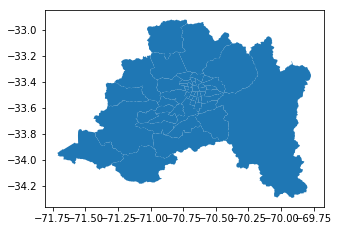

In [17]:
fix, ax = plt.subplots(figsize = (5,5))
street_map.plot(ax=ax)

In [0]:
def plot_route(df_gps, threshold_to_rute):
  crs = {'init' : 'epsg:4326'}
  geometry = [Point(xy) for xy in zip(df_gps["LON"],df_gps["LAT"])]
  
  gdf_gps = gpd.GeoDataFrame(df_gps, crs=crs, geometry=geometry)
  
  # Plotting
  fig, ax = plt.subplots(figsize=(15,15))
  street_map.plot(ax=ax, cmap="Blues") #color="white", edgecolor="black")
  gdf_gps[(gdf_gps["GPS_COD_SINRUT"]=="T315 E0 00I") & (gdf_gps["dist_to_rute"] <= threshold_to_rute)].plot(ax=ax, markersize=5, cmap="binary", marker="o", label="315e")
  plt.legend(prop={'size':15})

  minx, miny, maxx, maxy = gdf_gps.total_bounds
  ax.set_xlim(minx,maxx)
  ax.set_ylim(miny,maxy)

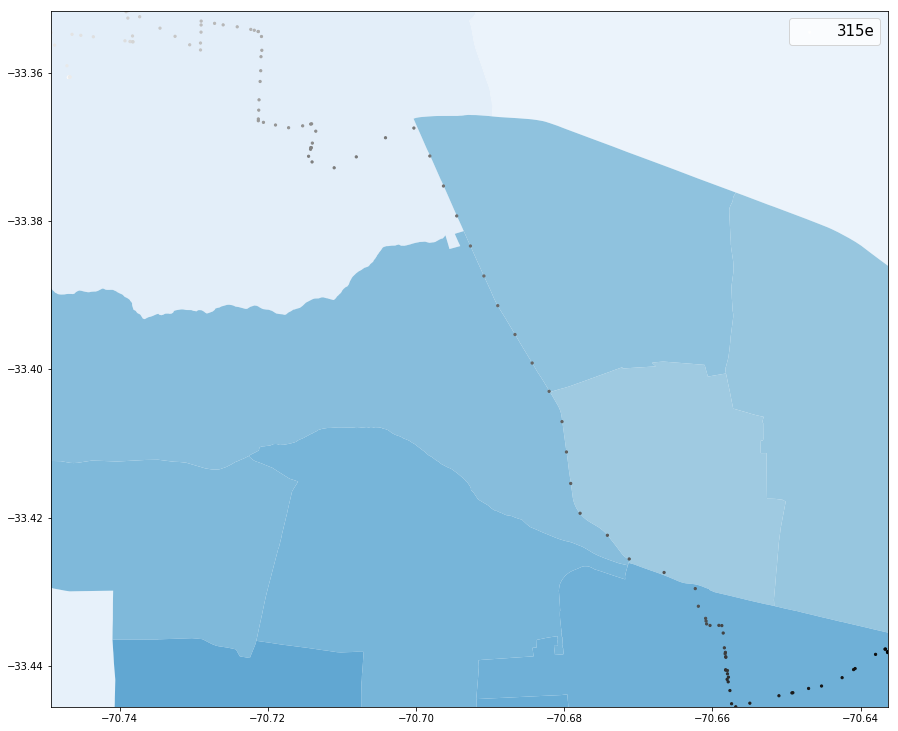

In [55]:
# Threshold to filter 
threshold_to_rute = 100

plot_route(df_gps, threshold_to_rute)

In [0]:
# Selection Data
#df_gps[df_gps["GPS_COD_SINRUT"].str.contains("00I")]

In [0]:
#df_gps.join(df_dict,how="inner")